# Yelp Me Eat

By Kavitha Dhanukodi, Zuhair Bhatti, Debparna Pratiher and Sarah Rahman

## Overview

For our final project, we chose to analyze the quality of food in restaurants in San Francisco by comparing restaurants in ten districts of San Francisco. 

Our project overview is as follows:

**Introduction and Motivation:** Why did we chose to analyze food quality of restaurants? Why did we choose San Francisco as our city for the analysis? Why did we choose particular datasets for our analysis? 

**Data acquisition:** We used four data sources to holistically analyze the quality of food in restaurants in San Francisco and arrive at our conclusion. Those are:

**Yelp API:** Ratings & Price - For average price and yelp rating of restaurants in each district.

**Yelp API:** Reviews - For quality of restaurants based on yelp reviews

**iwaspoisoned.com** - For amount of health complaints for each district.

**Health Inspection Rating** - For average health rating of each district.

**Conclusion and Considerations:** What did we learn from our analysis? What conclusion can be drawn from the four data sets that were analyzed? What future steps could be added to provide more in depth results or take this analysis to the next level?

This report goes over the findings of four datasets, the methodology used to analyze the dataset, the decisions we made to arrive at our conclusions and the results from the analysis. We have included our code in order to make it a consolidated notebook and report. Furthermore, each dataset has its own analysis and jupyter notebook included in the main directory of this project that can be run individually.

## Introduction

In this project, we wanted to assess the quality of restaurants in different parts of a big city and to see if any comparisons could be drawn within the city itself. We chose to analyze San Francisco as it is one of the biggest, most populated cities in America, with many diverse districts with large ranges of population, median household income, ethnicities, etc. We have all visited San Francisco on multiple occasions and one of our favorite things to do in the city is try out different restaurants! However, since none of us are San Francisco natives, we never know where the locals like to eat and which areas are known for better quality food.
 
We essentially wanted to see if restaurant quality differed within the same city and whether demographic information of the area could be used to explain certain trends. We also had a few hypotheses we wanted to test during the project. We know there are certain neighborhoods that are generally lower income and less gentrified compared to others which we hypothesized would have lower quality restaurants. The districts we thought would fall under this category were Market and Mission. On the other hand, there are other neighborhoods which are thought to have higher-end average incomes and are more expensive such as Nob Hill and Sunset districts. We hypothesized these districts would lead in terms of high quality restaurants. 

The first step was dividing the San Francisco neighborhoods into districts. While there are vague areas split into district, there are not any specific boundaries of districts. We started by collecting all the zipcodes of neighborhoods in San Francisco and then divided them into 10 districts according to area and other conventions used. Since we were comparing districts rather than specific restaurants in each district, we did not check to see the restaurants were similar between districts. 

We identified a few critical factors when assessing a restaurant’s quality - food quality, price, health and hygiene. A difficulty we encountered initially in the project is identifying these factors as well as measuring them and figuring out how much weight to give to each. We concluded that these were the most important aspects of quality and looked for relevant data sources to collect this information from. 
In order to assess food quality and price, we used the Yelp API for a combination of the Yelp ratings and price ratings. We also did a separate analysis on the Yelp reviews where we analyzed the content of the reviews per district and whether they were largely positive or negative. To assess health and hygiene, we used two different data sources. The first is the official health inspection ratings given to restaurants in each district. The second is an independent website, iwaspoisoned.com, where users report any food poisoning incidents or other unhygienic experiences at restaurants. We used a combination of all this data to compare overall quality of restaurants in different districts. 


## Districts and Demographics

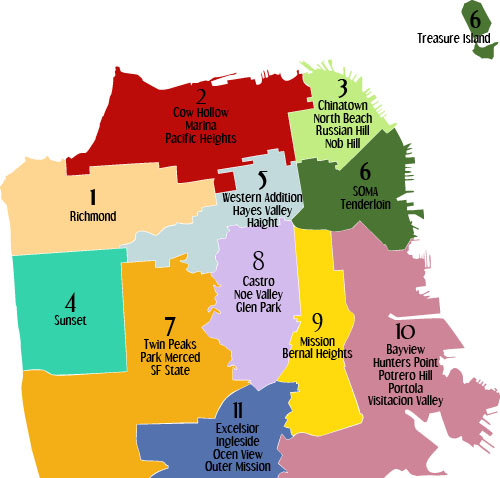

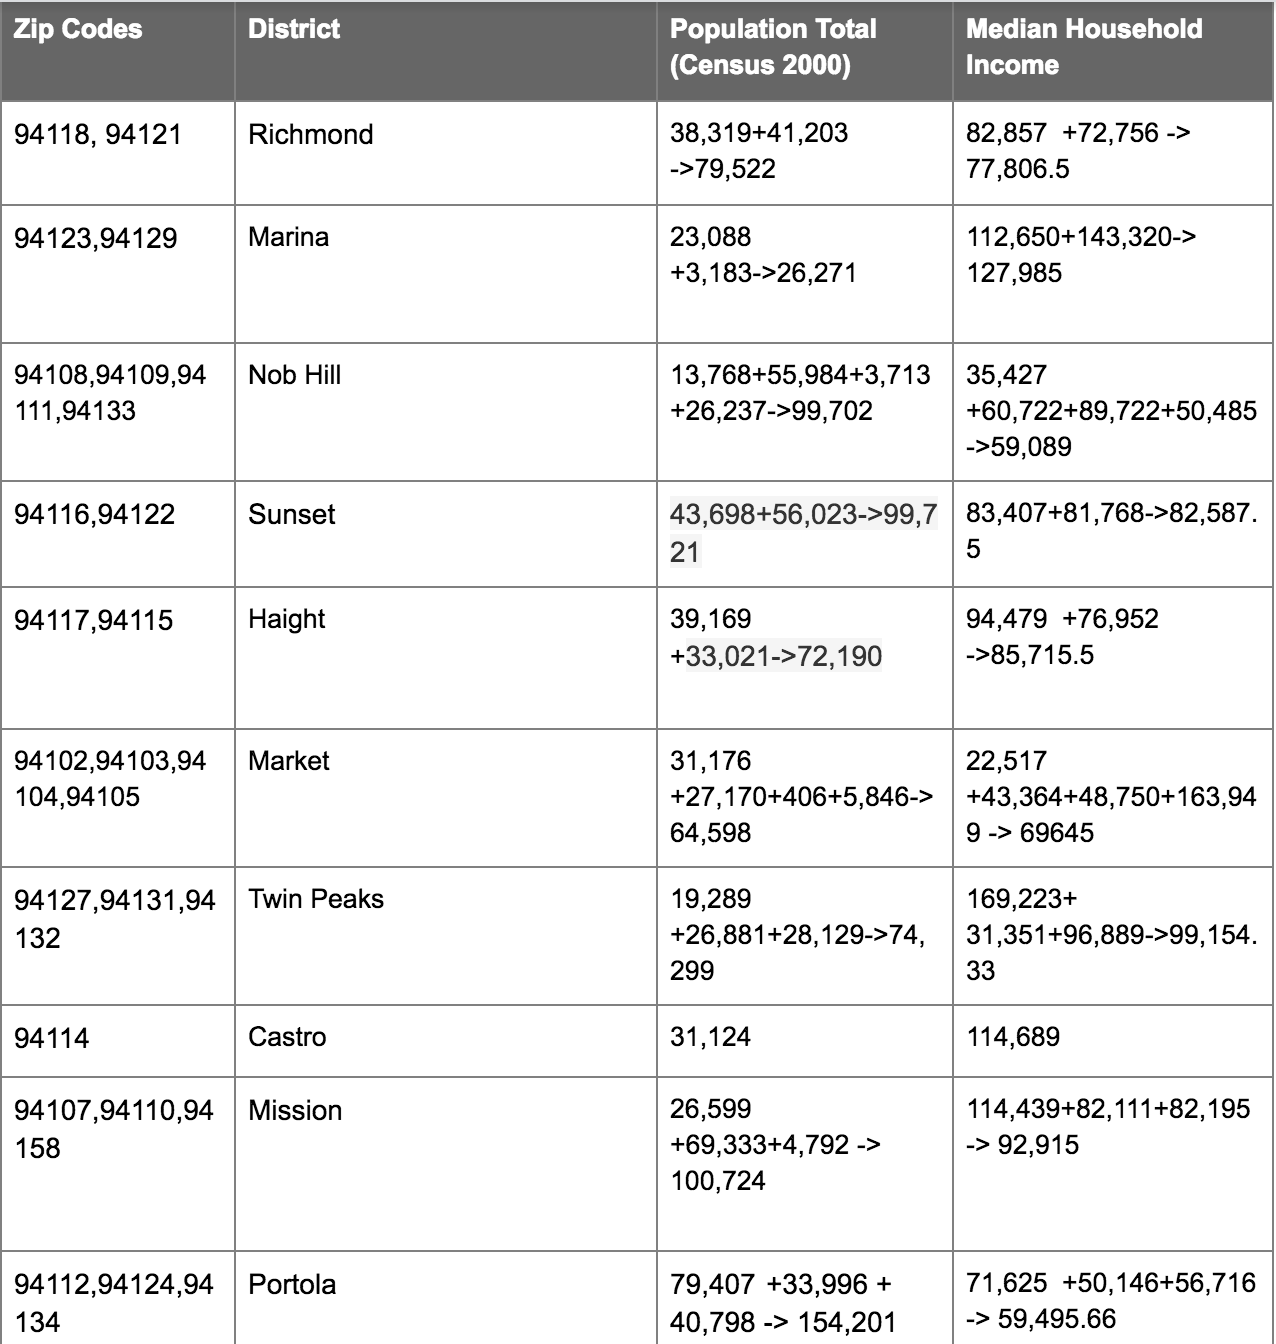

## Part 1: Yelp Ratings & Prices

### Context

In an effort to find a better understanding of the holistic breakdown of the qualities of food from district to district, we asked ourselves a very simple question: Do the average prices of resturanst in San Francisco determine the overall rating of the resturants? 

To perform this analysis we chose to use Yelp's rating and price measure and compare them to one another in an effort to better understand the relationship of ratints on the price of the food. Originally we were hypothesizing that the better rating a resturant had, the higher stars would follow, since the quality would derive a higher price. To explore this data we turned to Yelp's Fusion API. 


### Yelp

Yelp is an American multinational corporation headquartered in San Francisco, California. It develops, hosts and markets Yelp.com and the Yelp mobile app, which publish crowd-sourced reviews about local businesses, as well as the online reservation service Yelp Reservations. The company also trains small businesses in how to respond to reviews, hosts social events for reviewers, and provides data about businesses, including health inspection scores.

source: Wikipedia

The two features used in this project are :

1) /businesses/price - This returned for each resturant a price measure which was originally formatted in dollars signs ranging from one dollar sign to 4, which was converted 1 equaling one dollar sign up to 4 equaling four dollar signs.

2) /businesses/ratings - This returns the star ratings for individual resturants. Each star in the data frame was written as 1 for one star up to 5 for five stars.

### Methodology

To perform this analysis we accessed Yelp's Fusion API and extracted all the features for the top 50 relevant businesses in a particular zipcode. After extracted this information it was further narrowed down to extracting simply the ratings and price, and appending them all to a list that would eventually be averaged and the function that called the API simply returned the zipcode in question, average ratings, and the average price of resturanrs in the respective zipcode.

Running this function for all zipcodes and obtaining all the zipcodes and related average price/rating these were compiled into a dataframe. The zipcodes were then matched to their appropriate districts (there are 10 districts) and plotted.

The plot we used was a seaborn scatter plot, and the hue was set to districts to show all the zipcodes within a district, while still grouped together. This was done in order to obtain a clearer understanding of the resturant's price and ratings relationships, by adding more data points to be analyzed and avoiding generalizing.

In [1]:
import requests
import requests_cache
import pandas as pd
import time
import json
from statistics import mean 
  
def Average(lst): 
    return mean(lst)

requests_cache.install_cache("mycache")
#client_ID = "tnfQpIMYXXvTLF7qgwslXA"
# Reading in API key confidentially
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")

def get_sums(zipcode):   
    key = "ueXGy-SdiwVCXdYW1N09VnyjkWRjQZXKfH0XLT6FZVaJByT3IJGlgwHM8FlyGz8mR6ivRyEOg0NorQvm9Jgszre1XAJT6SOM1N1a_exfKFEb1XChbmcntqcY4lGIXHYx"
    bearer = "Bearer "
    value = bearer + key
    url = "https://api.yelp.com/v3/businesses/search"
    #Retrieves the JSON file
    response = requests.get(url, headers = {'Authorization': value} , params = {
            "location": zipcode,
            "limit": "50",
            "categories": "restaurants"
        })
    response.raise_for_status()
    str_detect = response.text
    yelp_df = response.json()["businesses"]
    df = pd.DataFrame(yelp_df)
    
    #Converting the prices to a quatifiable metric
    df.loc[df.price == '$', 'price'] = '1'
    df.loc[df.price == '$$', 'price'] = '2'
    df.loc[df.price == '$$$', 'price'] = '3'
    df.loc[df.price == '$$$$', 'price'] = '4'


    #new_column = pd.Series(['d', 'e'], name='price', index=[i])
    #df.update(new_column)
    
    # made to an int to compute, and as a float to later make the scatter plot
    mean_of_price = Average(df['price'].astype(float))
    mean_of_ratings = Average(df['rating'].astype(float))
   # mean_of_price = float(mean_of_price)
    #mean_of_ratings = float(mean_of_ratings)
    return zipcode, mean_of_ratings, mean_of_price

# Testing a specific zipcode
get_sums("94123")

('94123', 4.11, 2.3)

In [2]:
list = []
a = get_sums("94121")
b = get_sums("94118")
list.append(a)
list.append(b)
#print(list)
pd.DataFrame(list)

# Zip codes of San Francisco
zips = ("94118", "94121", "94123", "94129", "94108", "94109", "94111", "94133", "94116", "94122", "94117", "94115", "94102", "94103", "94104", "94105", "94127", "94131", "94132", "94114", "94107","94110", "94158", "94112","94124", "94134")
lst = []
for x in zips:
    sums = get_sums(x)
    lst.append(sums)
sums_df = pd.DataFrame(lst)

# Renaming all the columns appropriately
sums_df.columns = ['Zipcodes', 'Mean Ratings', 'Mean Price']

# Adding the appropriate districts to align to thier encompassed zipcodes
districts = ['Richmond', 'Richmond', 'Marina', 'Marina', 'Nob Hill', 'Nob Hill', 'Nob Hill', 'Nob Hill', 'Sunset', 'Sunset', 'Haight', 'Haight', 'Market', 'Market', 'Market', 'Market', 'Twin Peaks', 'Twin Peaks', 'Twin Peaks', 'Castro', 'Mission', 'Mission', 'Mission', 'Portola', 'Portola', 'Portola']

len(districts)
len(sums_df)

sums_df["Districts"] = districts
sums_df

,Zipcodes,Mean Ratings,Mean Price,Districts
0,94118,4.11,2.08,Richmond
1,94121,4.03,1.78,Richmond
2,94123,4.11,2.30,Marina
3,94129,4.05,1.98,Marina
4,94108,4.02,2.34,Nob Hill
5,94109,4.26,2.20,Nob Hill
6,94111,4.07,2.40,Nob Hill
7,94133,4.18,2.32,Nob Hill
8,94116,3.97,1.68,Sunset
9,94122,4.01,1.86,Sunset


### Results

Here we used seaborn plotting to plot all the zipcodes paired with their respective districts. Underneath that there is a fitted regression plot and the amount of variance around the fitted line.

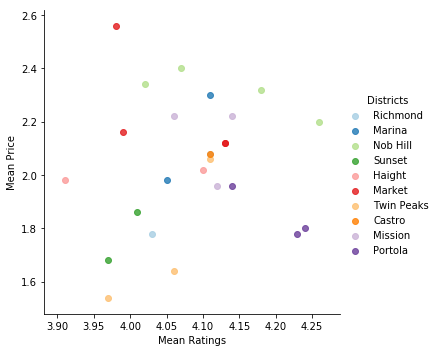

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Zip codes are categorized by district
sns.lmplot(x = 'Mean Ratings', y = 'Mean Price', data = sums_df, fit_reg = False, hue = 'Districts', legend = True, palette="Paired")


In [7]:
ratings = []
for i in sums_df['Mean Ratings']:
    ratings.append(i)

price = []
for i in sums_df['Mean Price']:
    price.append(i)
#print(price)
#print(ratings)

Raw fit results:
poly([0.93248629 0.27219577])
[array([1.52766266]), 2, array([1.41413562, 0.01484783]), 5.773159728050814e-15]
Fit: A = 0.272[P] + 0.932 (rms residual = 0.2424)


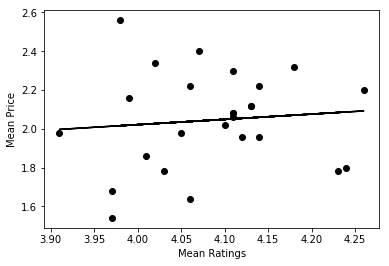

In [10]:
import numpy as np
import pylab
Polynomial = np.polynomial.Polynomial

# Used a regression formula from this source below
### https://scipython.com/book/chapter-6-numpy/examples/finding-a-best-fit-straight-line/ ###


ratings = np.array([4.11, 4.03, 4.11, 4.05, 4.02, 4.26, 4.07, 4.18, 3.97, 4.01, 4.1, 3.91, 4.13, 4.13, 3.99, 3.98, 4.06, 4.11, 3.97, 4.11, 4.14, 4.12, 4.06, 4.24, 4.14, 4.23])
price = np.array([2.08, 1.78, 2.3, 1.98, 2.34, 2.2, 2.4, 2.32, 1.68, 1.86, 2.02, 1.98, 2.12, 2.12, 2.16, 2.56, 1.64, 2.06, 1.54, 2.08, 2.22, 1.96, 2.22, 1.8, 1.96, 1.78])

cmin, cmax = min(ratings), max(ratings)
pfit, stats = Polynomial.fit(ratings, price, 1, full=True, window=(cmin, cmax),
                                                    domain=(cmin, cmax))

print('Raw fit results:', pfit, stats, sep='\n')

A0, m = pfit
resid, rank, sing_val, rcond = stats
rms = np.sqrt(resid[0]/len(price))

print('Fit: A = {:.3f}[P] + {:.3f}'.format(m, A0),
      '(rms residual = {:.4f})'.format(rms))

pylab.plot(ratings, price, 'o', color='k')
pylab.plot(ratings, pfit(ratings), color='k')
pylab.xlabel('Mean Ratings')
pylab.ylabel('Mean Price')
pylab.show()

### Observations and Comments


From the two plots above, one can see that there does not seem to be a strong relationship between the average price of resturants in each district with the average ratings. But, this may be due to the outliers such as the Portola district as well as Market, which seem to be completely contridictory to what we have had believed. What this does tells us is that when it comes to ratings there seems to be no strong increase in price as ratings increase. From this we can determine that in order to get better quality food, does not mean that necessariy you have to pay the most either. While this information is not as helpful in determining what factor may lead to better quality food, it can have interesting to dive deeper and find out why this is the way that it is.

Some districts that stood out were the Portola district for having some of the highest reviews, while maintaining some of the lowest prices. While Sunset and Nob Hill had some of the best quality food, while maintaining true to our argument that they would premium prices for this quality food. Taking a step further we conducted a regression these points and found that the variance around line of best fit was suprisingly not too high according to the "rms" of the regression. While there is no strong relationship, there may be something worth investigating further down the road. That would be great to probe into, as well as investigating how socio-economic situations effects 

## Part 2: Yelp Reviews

### Context

As a way to measure the quality of food in the restaurants of the ten different districts of San Francisco with other metrics we chose to analyze the resturaunt feedback of people in each of these districts. 

For this analysis, we chose the Yelp Review Dataset to perform a qualitative analysis of the reviews of each district in San Francisco. We chose to analyze the reviews of the restaurants because they collectively provide evidence to what people think of the food, if they are happy with it or if they do not like the place. The reviews from each district were collected using the Yelp Fusion API.

The two endpoints used in this project are :

1) /businesses/{id} - This endpoint returns detailed business content. Normally, you would get the Business ID from   /businesses/search, /businesses/search/phone, /transactions/{transaction_type}/search or /autocomplete. To retrieve review excerpts for a business, please refer to our Reviews endpoint (/businesses/{id}/reviews)

2) /businesses/{id}/reviews - This endpoint returns up to three review excerpts for a given business ordered by Yelp's default sort order

### Methodology

For this analysis, we took Yelp Business API and joined it with the Yelp Reviews API to get the reviews of 50 restaurants of each zip code that falls in that district. Therefore, each district's review analysis is based on 50 resturants of all the Zip codes that fall under it. 
The reviews are then put in a dataframe, after some text processing including removing stop words, and supplied to create word clouds. After generating word clouds, the corpus is then used to perform natural language processing using the NLTK library to  find the 30 highest frequency words and a frequency distribution of the most used 20 words. 
Based on this data, the most frequently used words of each district is used to find the general quality of the restaurants of these districts.

In [1]:
import requests
import json
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import scipy as sp # other science tools
import seaborn as sns

%matplotlib inline

# Web scraping tools
import lxml.html as lx
import requests
import requests_cache

requests_cache.install_cache("../iwaspoisoned")

In [12]:
api_key = 'qix_-d6s6a-OuxI1I8YSt-LvVHPuvmzg0DsBYFhdTq4Kpa82OcahY9f0nn_9FRt1kXlvyLuuE2mbTwVNieq7SKmCe5UO1i6Pn1PWkU31HLoFnLtxea-HSi28DraIXHYx'
headers = {'Authorization': 'Bearer %s' % api_key}

def request(Zip):    
    '''
    Function to make request to Yelp API with specific zip code.
    '''
    url = 'https://api.yelp.com/v3/businesses/search'
    params = {
            'location': Zip,
            'limit': '50',
            'catgeory' : 'Restaurants'
            }

    req = requests.get(url, params=params, headers=headers)
    parsed = json.loads(req.text)
    return parsed["businesses"] 
    
def analysis(SFZip):
    '''
    Function to combine review and business API and parse reviews to supply to futher analysis.
    '''
    df = pd.DataFrame()
 
    Reviews = []
    
    for i in SFZip:
        businesses = request(i)
        
        for business in businesses:
            zip = business["location"]["zip_code"]
            if zip == i:

                id = business["id"]

                url ="https://api.yelp.com/v3/businesses/" + id + "/reviews"
                req = requests.get(url, headers=headers)
                parsed = json.loads(req.text)

                reviews = parsed["reviews"]
                for review in reviews:
                    #print("Reviews:", review["text"] , "\n")
                    Reviews.append(review["text"]) 
                    break  
    return Reviews
     
def wordcloud_func(Reviews):
    '''
    Function to create wordclouds from reviews.
    '''
    plt.figure(figsize=(12,10))
    wordcloud = WordCloud(background_color='white', width=1200, stopwords = STOPWORDS, height=1000).generate(str(Reviews))
    plt.imshow(wordcloud)
    plt.axis('off');     


def freqAnalysis(resultText):
    '''
    Function to clean text and perform frequency distribution. 
    '''
    stopwords2 = ["the", "a", "and", "or", "in", "of", "to", "an", "said", "about", "on", "...", ",", "___", "s",
                 "The", "—", "``", "’", "'s", ":", "“", "About", ".", "are", "with", "14", "is", "that", "was", "at", 
                 "for", "he", "I", "not", "who", "will", "also", "says", "t", "from", "were", "has", "(", "But", "AM"
                 "'", "a.m.", "In", "@","$", "two", "like","make", "more", "She", "new", "could", "one", "it", "th", 
                  "p.m.", "told", "he", "would", "He", "A", "AP", "''", ")", "It", "say", '"', "!", "'m", "'ve", "This",
                 "&", "n't", "We", "They", "'re", "My", "get", "got", "go", "-", "since", "food", "place", "There"]

    #To remove digits for frequency analysis
    no_digits = []
    for i in resultText:
        if not i.isdigit():
            no_digits.append(i)

    resultText = ''.join(no_digits)

    stopwords = nltk.corpus.stopwords.words("english")
    words = nltk.word_tokenize(resultText)
    words = [w for w in words if w not in stopwords]
    words = [w for w in words if w not in stopwords2]
    fdist1 = FreqDist(words)

    #Most common wordss
    print("The top 30 most common words in the us-world category is:")
    fd_most_common = fdist1.most_common(30)
    print(fd_most_common)

    #PLOT
    fdist1.plot(20, cumulative=True)


### Results

### District 1: Market

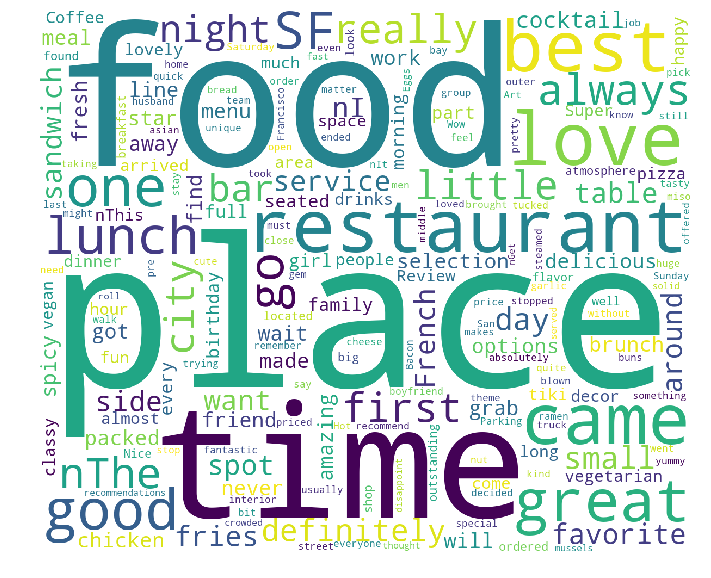

In [51]:
SFZip = ['94102', '94103', '94104', '94105']
Reviews = analysis(SFZip)
wordcloud_func(Reviews)

The top 30 most common words in the us-world category is:
[('time', 14), ('restaurant', 12), ('love', 12), ('good', 11), ('SF', 9), ('great', 9), ('lunch', 9), ('best', 8), ('came', 8), ('always', 8), ('little', 7), ('first', 7), ('city', 7), ('night', 6), ('really', 6), ('small', 6), ('day', 6), ('Came', 5), ('favorite', 5), ('want', 5), ('bar', 5), ('definitely', 5), ('fries', 5), ('around', 5), ('brunch', 4), ('options', 4), ('packed', 4), ('away', 4), ('side', 4), ('ever', 4)]


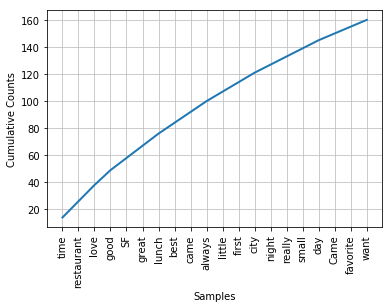

In [52]:
freqAnalysis(Reviews)

### District 2: Richmond


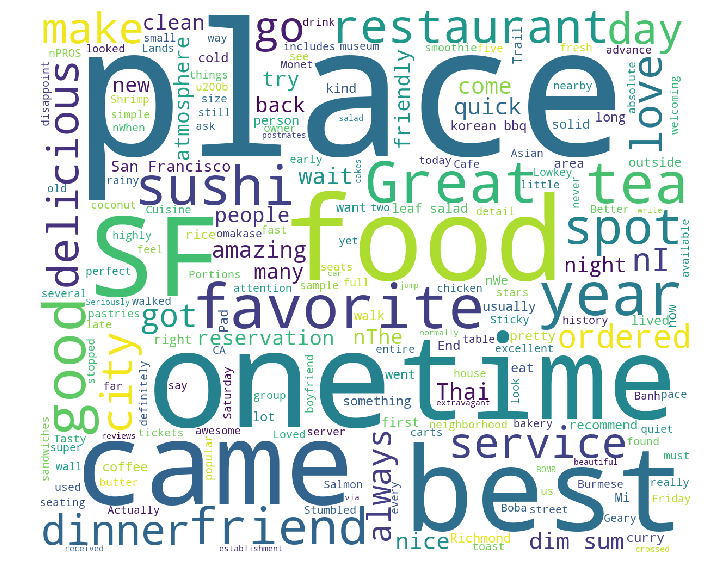

In [33]:
SFZip = ['94118', '94121']
Reviews = analysis(SFZip)
wordcloud_func(Reviews)

The top 30 most common words in the us-world category is:
[('best', 9), ('favorite', 9), ('SF', 8), ('tea', 7), ('time', 7), ('years', 6), ('good', 6), ('came', 6), ('dinner', 6), ('spot', 6), ('service', 5), ('delicious', 5), ('always', 5), ('city', 5), ('wait', 5), ('dim', 5), ('sum', 5), ('nice', 5), ('restaurant', 5), ('salad', 4), ('people', 4), ('Great', 4), ('amazing', 4), ('day', 4), ('try', 4), ('many', 4), ('San', 4), ('Francisco', 4), ('come', 4), ('Came', 4)]


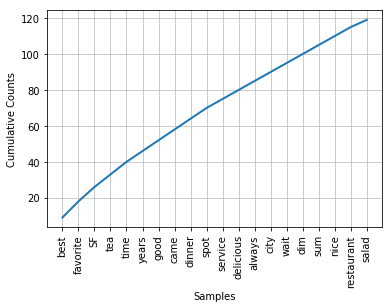

In [34]:
freqAnalysis(Reviews)

### District 3: Marina

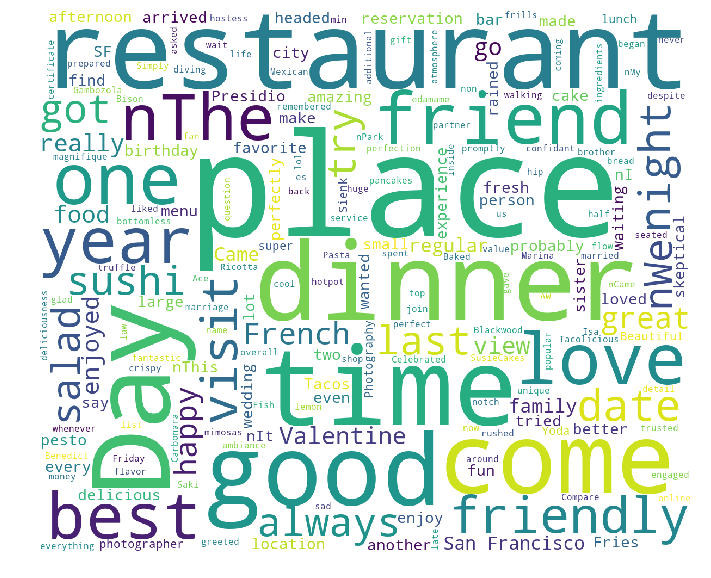

In [53]:
SFZip = ['94123', '94129']
Reviews = analysis(SFZip)
wordcloud_func(Reviews)

The top 30 most common words in the us-world category is:
[('dinner', 6), ('good', 5), ('time', 5), ('come', 4), ('friendly', 4), ('restaurant', 4), ('visit', 4), ('date', 3), ('always', 3), ('Day', 3), ('day', 3), ('sushi', 3), ('try', 3), ('friends', 3), ('happy', 3), ('really', 3), ('Came', 3), ('enjoyed', 3), ('family', 3), ('San', 3), ('Francisco', 3), ('night', 2), ('sister', 2), ('amazing', 2), ('fresh', 2), ('years', 2), ('last', 2), ('wedding', 2), ('cake', 2), ('Valentines', 2)]


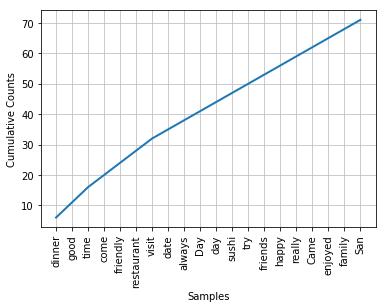

In [54]:
freqAnalysis(Reviews)

### District 4: Nob Hill


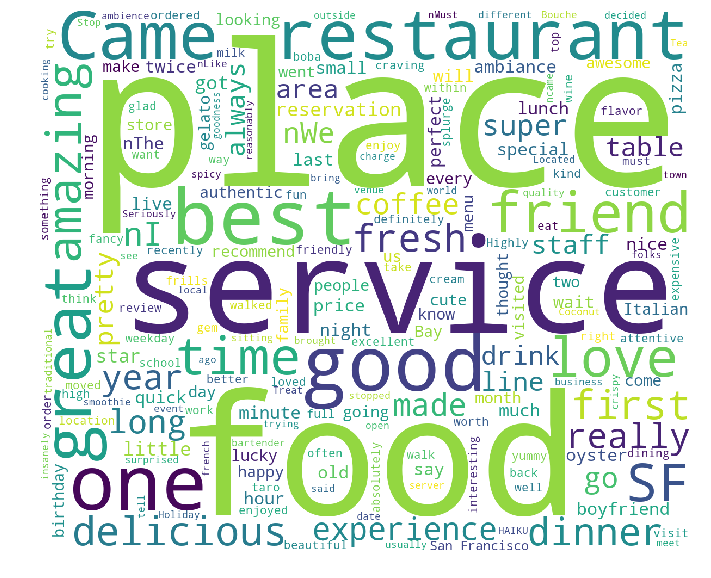

In [55]:
SFZip = ['94108', '94109', '94111', '94133']
Reviews = analysis(SFZip)
wordcloud_func(Reviews)

The top 30 most common words in the us-world category is:
[('service', 14), ('best', 14), ('good', 13), ('love', 12), ('SF', 12), ('restaurant', 11), ('time', 10), ('fresh', 9), ('really', 9), ('long', 8), ('Came', 8), ('delicious', 8), ('came', 8), ('dinner', 8), ('first', 8), ('made', 8), ('coffee', 7), ('great', 7), ('friends', 7), ('5', 7), ('Great', 7), ('experience', 7), ('friend', 7), ('line', 6), ('3', 6), ('pretty', 6), ('amazing', 6), ('always', 6), ('year', 6), ('perfect', 5)]


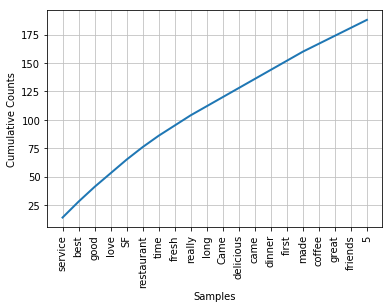

In [56]:
freqAnalysis(Reviews)

### District 5: Sunset

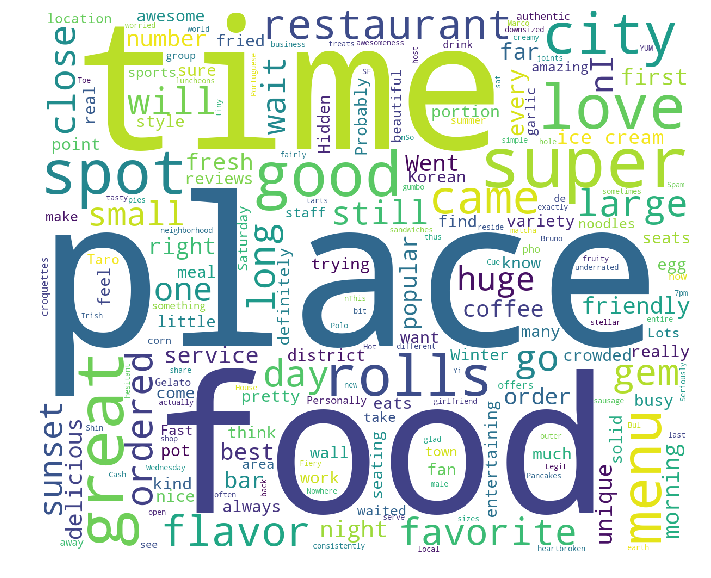

In [57]:
SFZip = ['94116','94122']
Reviews = analysis(SFZip)
wordcloud_func(Reviews)

The top 30 most common words in the us-world category is:
[('good', 6), ('super', 6), ('love', 5), ('great', 5), ('rolls', 5), ('time', 5), ('restaurant', 5), ('flavors', 4), ('large', 4), ('close', 4), ('menu', 4), ('ordered', 4), ('times', 4), ('favorite', 3), ('ice', 3), ('cream', 3), ('huge', 3), ('wait', 3), ('city', 3), ('still', 3), ('friendly', 3), ('night', 3), ('bar', 3), ('number', 3), ('every', 3), ('first', 3), ('morning', 3), ('spot', 3), ('long', 3), ('day', 3)]


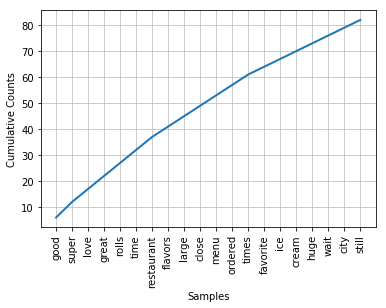

In [58]:
freqAnalysis(Reviews)

### District 6: Haight

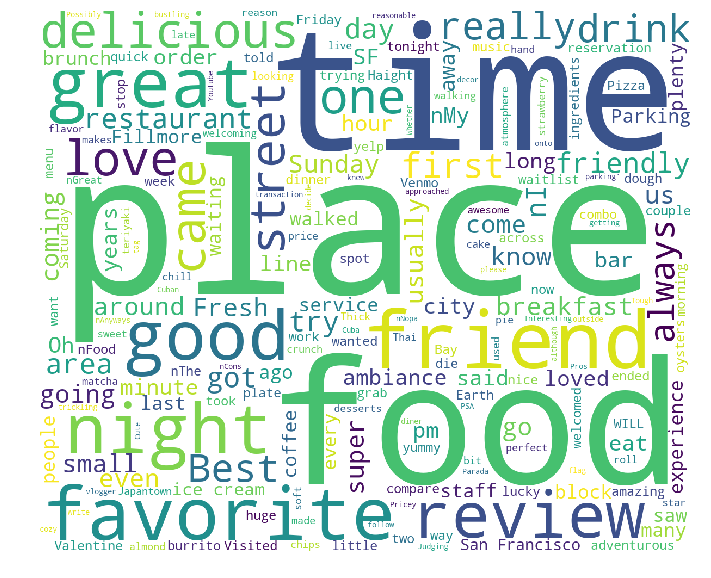

In [59]:
SFZip = ['94117', '94115']
Reviews = analysis(SFZip)
wordcloud_func(Reviews)

The top 30 most common words in the us-world category is:
[('time', 8), ('night', 7), ('favorite', 6), ('good', 6), ('friend', 6), ('always', 5), ('street', 5), ('friendly', 5), ('try', 5), ('Great', 5), ('Sunday', 4), ('first', 4), ('really', 4), ('come', 4), ('know', 4), ('going', 4), ('delicious', 4), ('breakfast', 4), ('great', 4), ('coming', 4), ('San', 4), ('us', 4), ('even', 4), ('area', 4), ('around', 4), ('came', 4), ('usually', 4), ('reviews', 3), ('line', 3), ('review', 3)]


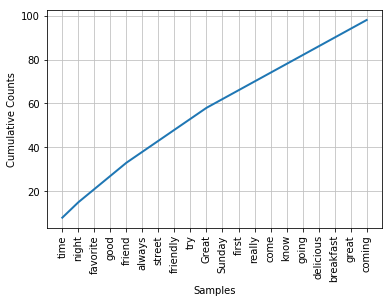

In [60]:
freqAnalysis(Reviews)

### District 7: Twin Peaks


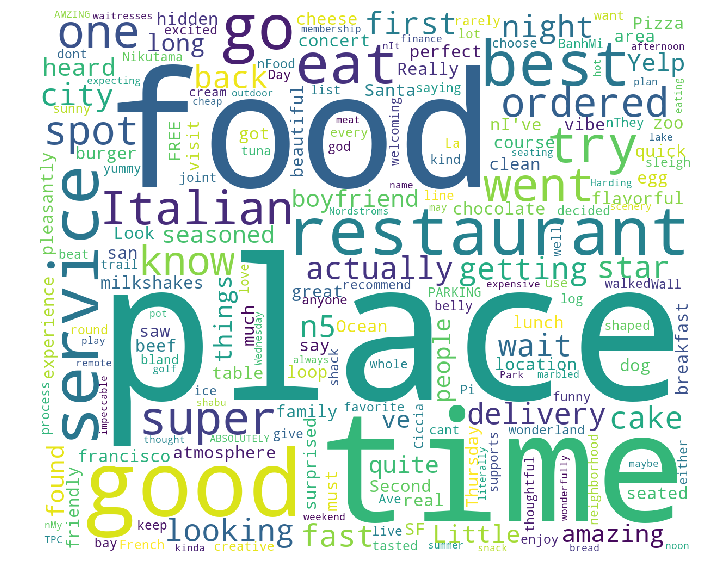

In [61]:
SFZip = ['94131', '94132', '94127']
Reviews = analysis(SFZip)
wordcloud_func(Reviews)

The top 30 most common words in the us-world category is:
[('time', 9), ('good', 6), ('restaurant', 6), ('try', 4), ('best', 4), ('super', 4), ('went', 4), ('service', 4), ('5/5', 4), ('know', 3), ('eat', 3), ('ordered', 3), ('looking', 3), ('fast', 3), ('getting', 3), ('You', 3), ('When', 3), ('actually', 3), ('Service', 3), ('wait', 3), ('night', 3), ('city', 3), ('Italian', 3), ('long', 2), ('heard', 2), ('things', 2), ('found', 2), ('Yelp', 2), ('boyfriend', 2), ('spot', 2)]


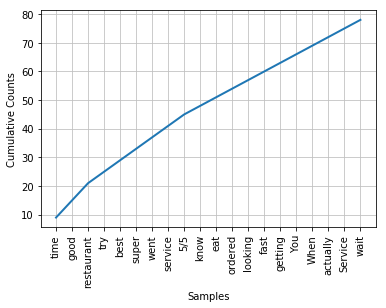

In [62]:
freqAnalysis(Reviews)

### District 8: Castro

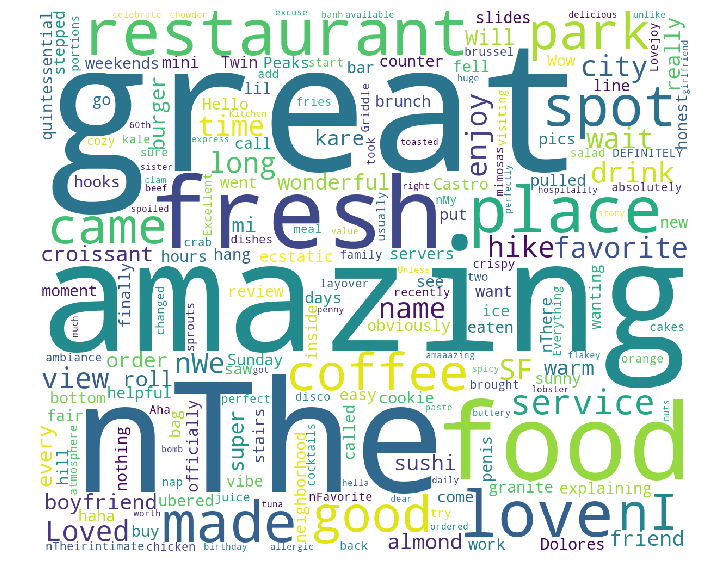

In [63]:
SFZip = ['94114']
Reviews = analysis(SFZip)
wordcloud_func(Reviews)

The top 30 most common words in the us-world category is:
[('great', 5), ('restaurant', 4), ('spot', 3), ('amazing', 3), ('made', 3), ('coffee', 3), ('good', 3), ('fresh', 3), ('Amazing', 2), ('long', 2), ('SF', 2), ('hike', 2), ('favorite', 2), ('love', 2), ('city', 2), ('enjoy', 2), ('came', 2), ('name', 2), ('wait', 2), ('time', 2), ('park', 2), ('8', 2), ('boyfriend', 2), ('LOVE', 2), ('service', 2), ('warm', 2), ('Fresh', 2), ('almond', 2), ('croissant', 2), ('super', 2)]


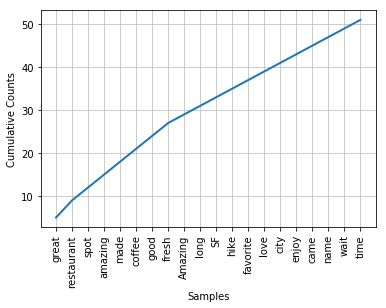

In [64]:
freqAnalysis(Reviews)

### District 9: Mission


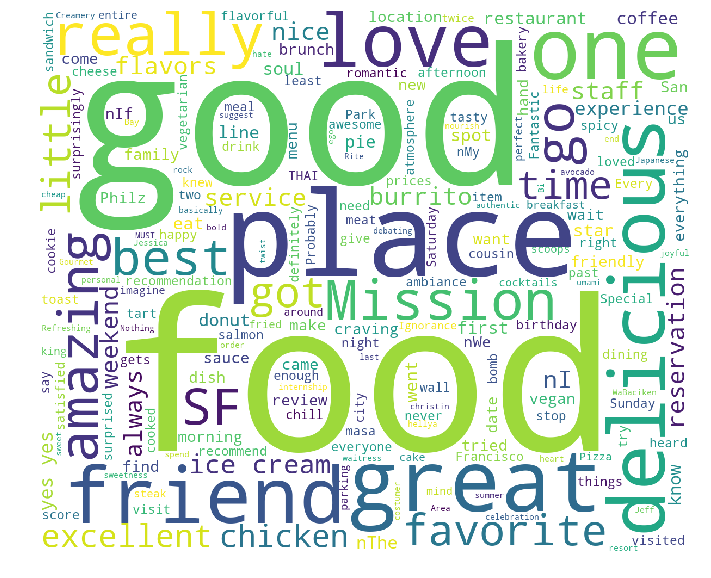

In [65]:
SFZip = ['94158', '94110', '94107']
Reviews = analysis(SFZip)
wordcloud_func(Reviews)

The top 30 most common words in the us-world category is:
[('good', 14), ('great', 11), ('delicious', 8), ('really', 8), ('SF', 7), ('little', 6), ('love', 6), ('ice', 6), ('cream', 6), ('?', 6), ('chicken', 6), ('amazing', 6), ('service', 5), ('staff', 5), ('If', 5), ('friends', 5), ('flavors', 5), ('best', 5), ('reservation', 5), ('nice', 5), ('experience', 5), ('yes', 5), ('weekend', 4), ('time', 4), ('ca', 4), ('always', 4), ('soul', 4), ('friend', 4), ('Mission', 4), ('excellent', 4)]


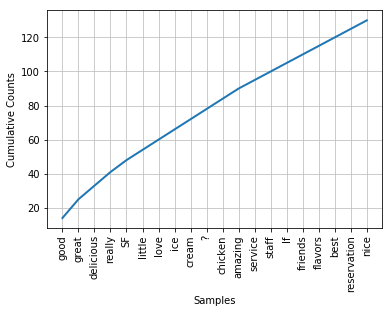

In [66]:
freqAnalysis(Reviews)

### District 10: Portola

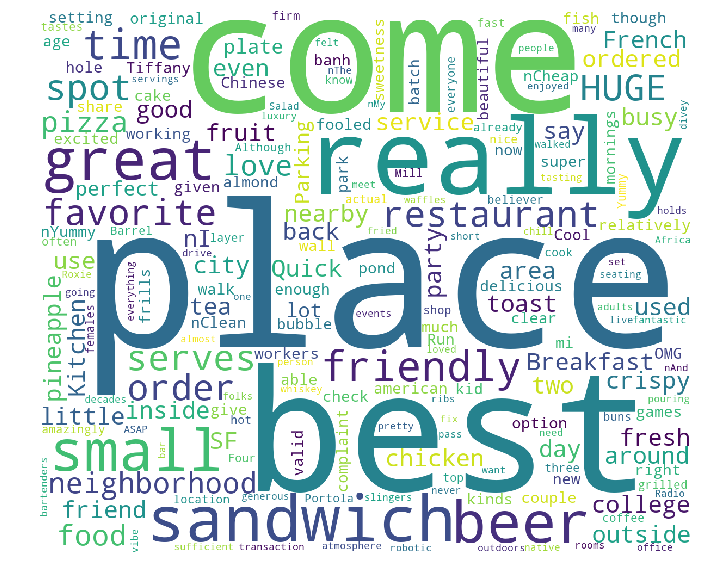

In [67]:
SFZip = ['94134', '94124', '94112']
Reviews = analysis(SFZip)
wordcloud_func(Reviews)

The top 30 most common words in the us-world category is:
[('best', 7), ('come', 6), ('really', 5), ('sandwich', 5), ('beer', 4), ('small', 4), ('friendly', 4), ('great', 3), ('spot', 3), ('serves', 3), ('And', 3), ('favorite', 3), ('neighborhood', 3), ('nearby', 2), ('French', 2), ('toast', 2), ('Do', 2), ('fresh', 2), ('Yummy', 2), ('2', 2), ('fruit', 2), ('So', 2), ('inside', 2), ('outside', 2), ('4', 2), ('college', 2), ('area', 2), ('Their', 2), ('HUGE', 2), ('used', 2)]


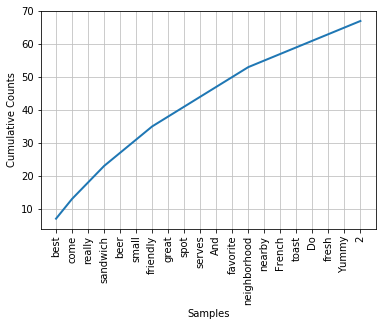

In [68]:
freqAnalysis(Reviews)

### Observations and Comments

From these graphs, charts and word clouds for the restaurants of the ten districts of San Francisco we can draw a few conclusions about the quality of food in each of these districts based on the Yelp reviews. I have provided a district by district analysis of the most frequently appearing words in each of 50 restaurants in each district. 

The analysis was performed using techniques taught in class. I created frequency distributions and word counts and manually analyzed them. There were some ambiguities as it is not always obvious what the connotations of certain words are. Some words could have either been positive or negative. In terms of deciding if a word is postive or negative, I did research on positive words from reviews and these are some of the words that indicate positivity in reviews[ delicious, great, amazing, excellent, good, best, awesome, perfect, love, friendly, stars, nice, fantastic, tasty, loved, favorite, yummy, bit, wonderful, definitely]. The negative words were words such as [never, bad, unhealthy, poisonous, hazardous, rotten, close, not].
Also it should be noted that only 50 restaurants from each zip code were used for this analysis.

For district market, we can see most common words such as "Favourite", "loooove", "always", "best time ever". Most of the words are positive. There are some negative words such as "nervous", "never" and "crowded". 

For district Richmond we can see most common words such as "good", "live", "best", "pretty" and "delicious". Most of the words are positive. There are not as many occurances of negative words with high frequency or any words that stood out. 

For district Nob Hill we can see most common words such as "Authentic", "good", "love", "service" and "really". Some words that occured frequently were a little ambiguous as "really", "long", "time", "late" and "good" were among the words that occured the most. This could either mean that the reviews meant really good or really long line and really late. This is ambiguous and the sentiment of the reviews could be either positive or negative. But looking at the word cloud and the general words, there were more positive words than negative words. The few negative words that stood out were "crowded", "closed and "late".

For district Sunset we can see most common words such as "delicious", "great" and"many". There seems to be an abundance of only positive words with the occurance of two negative words such as "never" and "long time". 

For district Haight we can see most common words such as "amazing", "must", "going", "service" and "recommend". Most of the words are positive. There are some negative words such as "last time" which is ambiguous because this could either be last time I came here or last time I am coming here. 

For district Twin Peaks had more negative words than postive words with some negative words really standing out such as "hazard", "long" and "never".

For district Castro we can see most common words such as "love" and the rest of the most occuring words were "rude", "fasting" and "wrong. 

From this analysis, we can conclude that based on the reviews of each district of San Francisco, Sunset, Nob Hill and Mission stood out as the ones with the districts with the most positively worded reviews. Dictricts Twin Peaks, Market and Castro had the most negatively worded reviews. 

For further and more accurate analysis, I could have implemented NLP techniques such as word tagging and classification of positive and negative words. I could have also combined review data from other sources to account for people other than just yelp users. More data from each district would have provided a better picture.

## Part 3: Health Inspection Data

### Context
Now we are going into another aspect of quality which is health but from the perspective of a public health agency instead of a consumer. The Department of Public Health preforms annual health inspections and uses as inspection scoring system to rate each restaurant. The health inspector will calculate a score based on the violations observed. According to sfdph.org, health violations fall into three categories:

High Risk: Violations that directly relate to the transmission of food borne illnesses, the adulteration of food products and the contamination of food-contact surfaces.
Moderate Risk: Violations that are of a moderate risk to the public health and safety.
Low Risk: Violations that are low risk or have no immediate risk to the public health and safety.

The inspections also provided an inspection score for each food establishment. The scores were a number from 0 - 100. The following explains the scores:

Greater than 90: GOOD (Only lower-risk health and safety violations observed. May have high-risk violations.)
Between 89-90: ADEQUATE (Several violations observed. May have high-risk violations.)
Between 71-85: NEEDS IMPROVEMENT (Multiple violations observed. Typically, several high-risk violations.)
Less than 71: POOR (Multiple violations observed. Typically, several high-risk violations.)

### Methodology
In terms of assessning health risk, we need to choose a metric to use (like inspection score or the risk_category) To choose a category , we decided to look at the category that fits the data better, i.e. the category that most resturants had.

The following uses the SOAP API from the health inspection website for SF : https://data.sfgov.org/widgets/pyih-qa8i

In [22]:
# Our usual data science tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp # other science tools
import seaborn as sns

%matplotlib inline

# Web scraping tools
import lxml.html as lx
import requests
import requests_cache

requests_cache.install_cache("../craigslist")

def get_api():
    """
    Function that gets the data from SF GOV API
    """
    response = requests.get(" https://data.sfgov.org/resource/sipz-fjte.json")
    response.raise_for_status()
    response = response.json()
    return response
result = get_api()

In [23]:
def get_risk(array):
    """
    Function that uses the results from the api to extract the number of food establishments
    that have a risk score rating.
    """
    risk = []
    count = 0
    for each in array:
        if 'risk_category' not in each:
            count = count + 1
            continue
        #print(each["risk_category"])
    print("total categories that don't have risk: ", count)
    return count

  
def get_score(array):
    """
    Function that uses the results as input to extract the number of food establishments
    that have an inspection score rating.
    """
    risk = []
    count = 0
    for each in array:
        if 'inspection_score' not in each:
            count = count + 1
            continue
        #print(each["inspection_score"])
    print("total categories that don't have inspection_score: ", count)
    return count

    

In [11]:
risk_count = get_risk(result)
score_count = get_score(result)


total categories that don't have risk:  329
total categories that don't have inspection_score:  373


We can see that there are 44 more restuarants that have the risk cateory assigned, we we will start off using that as a metric to determine the health of the food at a restauarant. 

In [13]:
Richmond = [94118, 94121]
Marina = [94123,94129]
Nob_Hill = [94108,94109,94111,94133]
Sunset = [94116,94122]
Haight = [94117,94115]
Market = [94102,94103,94104,94105]
Twin_Peaks = [94127,94131,94132]
Castro = [94114]
Mission = [94107,94110,94158]
Portola = [94112,94124,94134]
def get_risk_zipcode(array):
    """
    Function that creates a data frame that uses the grouping of zipcodes to create a
    column that classifies a food establishment into districts using the zipcode.
    Also creates columns that store the zip codes and the risk category of the restaurant. 
    """
    zipcode = []
    risk = []
    district = []
    for each in array:
        if 'risk_category' not in each:
            continue
        if 'business_postal_code' not in each:
            continue

        if int(each["business_postal_code"]) in Richmond:
            district.append("Richmond")
        elif int(each["business_postal_code"]) in Marina:
            district.append("Marina")
        elif int(each["business_postal_code"]) in Nob_Hill:
            district.append("Nob_Hill")
        elif int(each["business_postal_code"]) in Sunset:
            district.append("Sunset")
        elif int(each["business_postal_code"]) in Haight:
            district.append("Haight")
        elif int(each["business_postal_code"]) in Market:
            district.append("Market")
        elif int(each["business_postal_code"]) in Twin_Peaks:
            district.append("Twin_Peaks")
        elif int(each["business_postal_code"]) in Castro:
            district.append("Castro")
        elif int(each["business_postal_code"]) in Mission:
            district.append("Mission")
        elif int(each["business_postal_code"]) in Portola:
            district.append("Portola")
        else:
            print(int(each["business_postal_code"]))
#             district.append("None")
            continue
        risk.append(each["risk_category"])
        zipcode.append(each["business_postal_code"])
    d = {'zipcode': zipcode, 'risk': risk, 'district': district}  
    df = pd.DataFrame(data=d)
    return df



In [14]:
import matplotlib.pyplot
import seaborn as sns
from pandas import DataFrame
import numpy as np

df = get_risk_zipcode(result)
print(df['risk'][0] == 'Low Risk')
df_low = df[df['risk'] == 'Low Risk']
df_mod = df[df['risk'] == 'Moderate Risk']
df_high = df[df['risk'] == 'High Risk']


95132
94544
True


NOTE: there were two zipcodes that were not included in our San Franciscio District Zipcodes (94544 and 95132). To further investigate whether or not they are outliers or if we should've included these zipcodes, we reaseached where these places are.

94544 is a zipcode in Hayward so it was clearly an outlier and should be removed from the data set. 
95132 however is the zipcode of a place in San Jose that had "The San Francisco Bay Area Gold League". The similarity in the name "San Francisco" could explain why this data point eaccidently ended up in our data set, howevere since it is still located in San Jose, we must discard this point. 

### Results

Districts with Low Risks


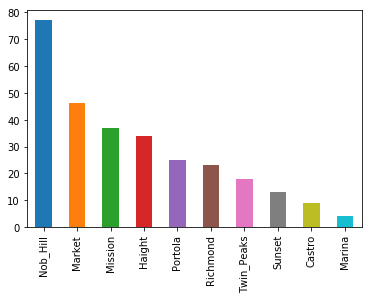

In [13]:
df_low['district'].value_counts().plot('bar')
print("Districts with Low Risks")

Districts with Moderate Risks


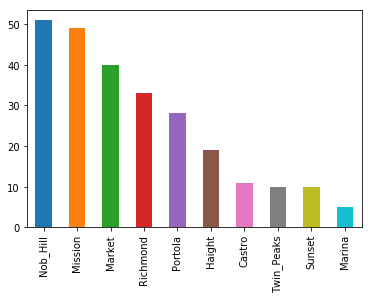

In [14]:
df_mod['district'].value_counts().plot('bar')
print("Districts with Moderate Risks")

Districts with High Risks


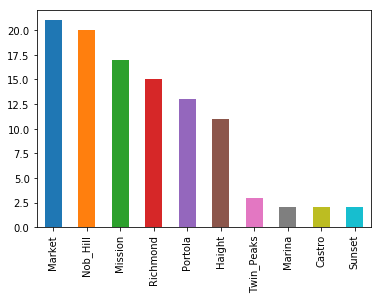

In [15]:
df_high['district'].value_counts().plot('bar')
print("Districts with High Risks")

In [24]:

def get_average_plots(data_frame):
    """
    Function that converts the risk categories of low moderate high to 0 1 2
    """
    risk_num = []

    for each in df['risk']:
        if each == "Low Risk":
            risk_num.append(0)
        elif each == "Moderate Risk":
            risk_num.append(1)
        elif each == "High Risk":
            risk_num.append(2)
        else:
            print("error")
            risk_num.append(10)
    d = { 'risk_num': risk_num, 'district': df['district']}  
    df_new = pd.DataFrame(data=d)
    return df_new
df_new=get_average_plots(df)
df_new



,risk_num,district
0,0,Market
1,1,Haight
2,0,Nob_Hill
3,1,Richmond
4,0,Richmond
5,0,Twin_Peaks
6,1,Sunset
7,1,Mission
8,1,Haight
9,0,Nob_Hill


In [17]:

###Get the average for each district!
# df_low = df[df['risk'] == 'Low Risk']
df_Richmond = df_new[df_new['district'] == 'Richmond']
df_Marina = df_new[df_new['district'] == 'Marina']
df_Nob_Hill = df_new[df_new['district'] == 'Nob_Hill']
df_Sunset = df_new[df_new['district'] == 'Sunset']
df_Haight = df_new[df_new['district'] == 'Haight']
df_Market = df_new[df_new['district'] == 'Market']
df_Twin_Peaks = df_new[df_new['district'] == 'Twin_Peaks']
df_Castro = df_new[df_new['district'] == 'Castro']
df_Mission = df_new[df_new['district'] == 'Mission']
df_Portola = df_new[df_new['district'] == 'Portola']


In [18]:

df_new2 = pd.pivot_table(df_new, index='district', columns='risk_num', aggfunc=len, fill_value=0)
df_new2['sum'] = df_new2[df_new2.columns].sum(axis=1)
# df_new2['avg'] = df_new2['sum'] / (len(df_new2.columns) - 1)
df_new2

risk_num,0,1,2,sum
district,,,,
Castro,9,11,2,22
Haight,34,19,11,64
Marina,4,5,2,11
Market,46,40,21,107
Mission,37,49,17,103
Nob_Hill,77,51,20,148
Portola,25,28,13,66
Richmond,23,33,15,71
Sunset,13,10,2,25


In [20]:
def get_percentages(df):
    """
    Function that calculates the percentage of risks for each district separately.
    """
    df['low_risk'] = df[0]/df['sum']
    df['moderate_risk'] = df[1]/df['sum']
    df['high_risk'] = df[2]/df['sum']

df_new3 = df_new2
df_new3['low_risk'] = 0
df_new3['moderate_risk'] = 0
df_new3['high_risk'] = 0

get_percentages(df_new3)
df_new3


risk_num,0,1,2,sum,low_risk,moderate_risk,high_risk
district,,,,,,,
Castro,9,11,2,22,0.409091,0.500000,0.090909
Haight,34,19,11,64,0.531250,0.296875,0.171875
Marina,4,5,2,11,0.363636,0.454545,0.181818
Market,46,40,21,107,0.429907,0.373832,0.196262
Mission,37,49,17,103,0.359223,0.475728,0.165049
Nob_Hill,77,51,20,148,0.520270,0.344595,0.135135
Portola,25,28,13,66,0.378788,0.424242,0.196970
Richmond,23,33,15,71,0.323944,0.464789,0.211268
Sunset,13,10,2,25,0.520000,0.400000,0.080000


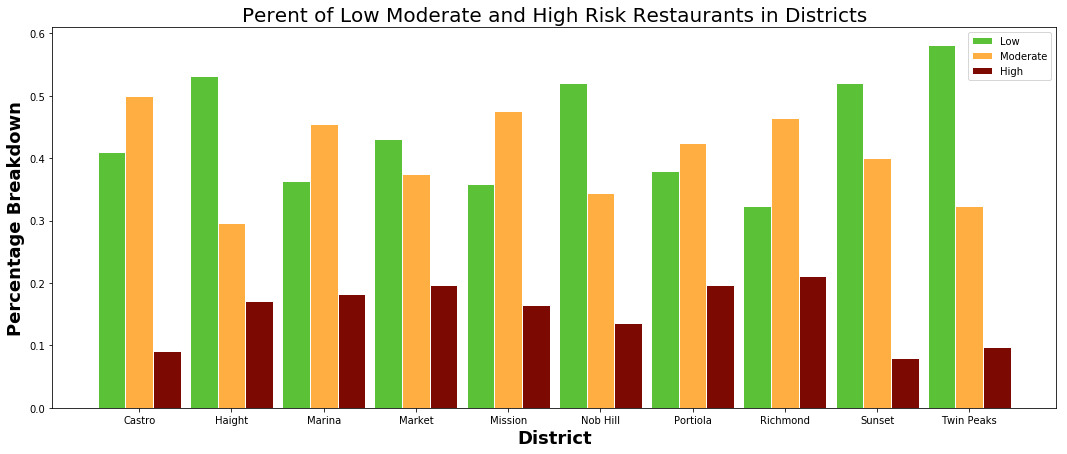

In [27]:

#Graph the districts
next(df_new3.iterrows())[1]

district = []
low = []
med = []
high = []

for index, row in df_new3.head(n=10).iterrows():
    perc = []
    low.append(row['low_risk'])
    med.append(row['moderate_risk'])
    high.append(row['high_risk'])
    perc.append(row['low_risk'])
    perc.append(row['moderate_risk'])
    perc.append(row['high_risk'])
    district.append(perc)

barWidth = 0.3
f, ax = plt.subplots(figsize=(18,7))
# set height of bar
bars1 = low
bars2 = med
bars3 = high
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#5BC238', width=barWidth, edgecolor='white', label='Low')
plt.bar(r2, bars2, color='#ffAE42', width=barWidth, edgecolor='white', label='Moderate')
plt.bar(r3, bars3, color='#7C0A02', width=barWidth, edgecolor='white', label='High')
 
plt.xticks([r + barWidth for r in range(len(bars1))], ['Castro', 'Haight', 'Marina', 'Market', 'Mission', 'Nob Hill', 'Portiola', 'Richmond', 'Sunset', 'Twin Peaks'])
 
# Create legend & Show graphic
plt.xlabel('District', fontsize=18,fontweight='bold')
plt.ylabel('Percentage Breakdown', fontsize=18,fontweight='bold')
ax.set_title("Perent of Low Moderate and High Risk Restaurants in Districts", fontsize=20)
plt.legend()
plt.show()




### Observations and Comments

Which districts were the cleanest?
The district that had the highest percentage of 'low risk' violations were twin peaks. Looking at the highest percent of low risks is important because it means less moderate and high risks. Furthermore, it has the second lowest moderate risks as well, making it a very 'safe' district to eat at.
When looking at only the high risks however, we can see that the Sunset district and Castro district and Twin Peaks follow as the 3 districts with the lowest high risks respectively. These three districts have populations of 99, 74 and 31 thousand which comparatively are lower population areas. Also it is noteabe that castro is a very small area in San Francisco (only consits of one zipcode) while sunset and twin peas have 2 -3 zip code areas.

Which districts weren't the cleanest? 
Now the districts had bad health inspection ratings are Richmond and Market district. Almost 22% of food establishments in Richmond fall in the 'high risk category', and compared to all other districts, this category is the highest. Similarly Marlet has around 1 in 5 food establshments rated as 'high risk' places. Recall that high risk category means the restaurant has violations that directly relate to the transmission of food borne illnesses, and the contamination of food-contact surfaces. In other words it might be a good idea to advise consumers to be cautions when eating in the Richmond and Market district.

## Part 4: iwaspoisoned.com

### Context

One of the datasources we thought would be relevant to assessing the health aspect of quality of restaurants in districts in San Francisco is [iwaspoisoned.com](https://www.iwaspoisoned.com). Iwaspoisoned.com is a consumer led website for diners to report suspected food poisoning or bad food experiences. The website collects and screens reports of foodborne illness across the United States and the world, and shares that information with public health departments and industry. 

The intention behind examining these health reports was to see from which district the most number of negative health experiences were reported. Rather than considering the number of reports on a restaurant-level, we would aggregate all the data of any restaurant in a given district. This could help us compare the general quality of restaurants in each district, specifically the health aspect in this case. 

### Methodology

The metric to compare the different San Francisco districts using the website is the number of reports of restaurants in each district. The content or description of the health report is not important to us since we know the sentiment will be negative if it is reported on the site. This is in contrast to yelp reviews where the content of the review is helpful to our analysis since it can be positive or negative. In the case of iwaspoisoned.com, users only report negative health experiences to the website so an analysis of the content will not produce any significant results. As a result, we are only considering the total number of reports per district to determine the quality of restaurants in each area.

Since each report includes the address of the restaurant being reported, the way this data collection was possible was by scraping the website to get the total number of reports of restaurants by zipcode and then aggregating the data by district. We created a list of zip codes of all the neighborhood in San Francisco. We then had to divide the zipcodes according to the 10 main districts we defined according to the popular sources we researched. 

The layout of the website was such that not all the reports contained the full address of the restaurant on the homepage. While location is part of the report preview as the restaurant name is required, not all of them listed the zipcodes of the restaurant. We realized that most reports listed the complete addresses, including the zipcode, once you click on the report link individually and redirected to the report-specific page. As a result, we first created a function to get all the links of each report from the home page so they can be queried individually.

In [3]:
def get_links(url, page):
    """
    Function to get links of each individual report on page.
    Input: page (int) - page to scrape for links
           url (string) - url to scrape for links
    Output: links (list) - list of links
    """
    
    # scrape url with page parameter
    response = requests.get(url, params = {
        "page": page
    })
    try:
        response.raise_for_status()
    except:
        print("The url couldn't be downloaded.\n")
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)
    
    # scrape main content section of page
    reports = html.xpath("//div[contains(@class, 'textReports')]/text()")[0]
    reports = reports.strip()
    
    # check to see if end of results has been reached
    if reports == 'No incidents':
        return
    
    # if there are reports on the page, get list of links
    links = html.xpath("//section[contains(@class,'page-content')]//div[contains(@class,'col-md-6 report-first-box')]/a//@href")
    return links

Once we were able to scrape each report individually, we extracted the zipcode from the address of the restaurant reported.

In [4]:
def get_zipcode(url):
    """
    Function to get zipcode from restaurant address of report.
    Input: url (string) - url to scrape for zipcode
    Output: zipcode (string) - zipcode of restaurant reported
    """
    
    response = requests.get(url)
    response.text
    try:
        response.raise_for_status()
    except:
        print("The url couldn't be downloaded.\n")
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)
    
    # scrape address line from report
    links = html.xpath("//span[contains(@class,'pl-1 py-0 text-muted')]/text()")[0]
    
    # get zipcode from address
    zipcode = links.split('\n')[3].strip()
    return zipcode

The exact url we scraped included the location of reports set to San Francisco, so the complete url was "https://iwaspoisoned.com/location/united-states/california/san-francisco". This way, we would not have to filter through the zipcodes returned to choose the relevant ones in a San Francisco district. The main part of the web scraping takes place in a loop to go through all the pages of reports. Since there was no way to scrape the total number of pages of reports, we realized that when the end of the reports was reached, the website displays "No incidents". So we added a check to our function that gets the report links to see if this string was returned. If it is, then the function returns an empty list and in our main function we maintain a while loop which continues while the list returned is not empty. 

In order to keep track of the number of reports per zipcode, we create and populate a dictionary where the keys are the zipcodes and the values are the counts of reports for restaurants in that zipcode. 

In [5]:
def compute_freqs(url):
    """
    Function to compute counts of reports of restaurants by zipcode.
    Input: url (string) - url to scrape for links
    Output: zipcode_dict (dict) - dictionary with keys as zipcodes and keys as count of reports
    """
    
    i = 1
    
    # get list of report links
    links = get_links(url, i)
    zipcode_dict = dict()
    
    # loop through pages of reports until list of report links returned is empty
    while links != None:
        
        # iterate through each report
        for link in links:
            zipcode = get_zipcode(link)
            if zipcode == "":
                continue

            # if zipcode is already in dictionary, increment count
            if zipcode in zipcode_dict.keys():
                zipcode_dict[zipcode] += 1
                
            # else add zipcode to dictionary with count of 1
            else:
                zipcode_dict[zipcode] = 1
        
        i += 1
        links = get_links(url, i)
    return zipcode_dict

# url with location set to San Francisco
url = "https://iwaspoisoned.com/location/united-states/california/san-francisco"
dictionary = compute_freqs(url)
dictionary
        

{'94109': 49,
 '94107': 29,
 '94121': 43,
 '94104': 13,
 '94111': 37,
 '94132': 22,
 '94118': 55,
 '94105': 29,
 '94115': 22,
 '94124': 24,
 '94102': 38,
 '94108': 21,
 '94133': 32,
 '94112': 22,
 '94117': 11,
 '94103': 62,
 '94110': 29,
 '94134': 7,
 '94131': 1,
 '94114': 14,
 '94122': 17,
 '94128': 22,
 '94123': 15,
 '94158': 1,
 '94127': 2,
 '94143': 1}

We noticed that not all the zipcodes of the neighborhoods in San Francisco were included in the iwaspoisoned reports. As a result, we listed all the zipcodes we were considering for San Francisco and added those not found in the reports to the dictionary with a value of 0. 

In [6]:
# list of all zipcodes in San Francisco
sf_zips = [94102, 94103, 94104, 94105, 94107, 94108, 94109, 94110, 94111, 94112, 94114, 94115, 94116, 
           94117, 94118, 94121, 94122, 94123, 94124, 94127, 94129, 94131, 94132, 94133, 94134, 94158]

# if SF zipcode has no reports, add to dictionary with count 0
for zipcode in sf_zips:
    if str(zipcode) not in dictionary.keys():
        dictionary[str(zipcode)] = 0
        
dictionary

{'94109': 49,
 '94107': 29,
 '94121': 43,
 '94104': 13,
 '94111': 37,
 '94132': 22,
 '94118': 55,
 '94105': 29,
 '94115': 22,
 '94124': 24,
 '94102': 38,
 '94108': 21,
 '94133': 32,
 '94112': 22,
 '94117': 11,
 '94103': 62,
 '94110': 29,
 '94134': 7,
 '94131': 1,
 '94114': 14,
 '94122': 17,
 '94128': 22,
 '94123': 15,
 '94158': 1,
 '94127': 2,
 '94143': 1,
 '94116': 0,
 '94129': 0}

In order to get the number of reports per district, we added the counts of the reports of each zipcode in that district. We created a new dictionary with the key as the district and the value as the total count of reports in the district. 

In [8]:
# add counts of all zipcodes in each district to get total count of reports of district
district_dict = dict()
district_dict["Richmond"] = dictionary["94118"] + dictionary["94121"] 
district_dict["Marina"] = dictionary["94123"] + dictionary["94129"]
district_dict["Nob Hill"] = dictionary["94108"] + dictionary["94109"] + dictionary["94111"] + dictionary["94133"] 
district_dict["Sunset"] = dictionary["94116"] + dictionary["94122"] 
district_dict["Haight"] = dictionary["94117"] + dictionary["94115"] 
district_dict["Market"] = dictionary["94102"] + dictionary["94103"]+ dictionary["94104"] + dictionary["94105"]
district_dict["Twin Peaks"] = dictionary["94127"] + dictionary["94131"] + dictionary["94132"]
district_dict["Castro"] = dictionary["94114"]
district_dict["Mission"] = dictionary["94107"] + dictionary["94110"] + dictionary["94158"]
district_dict["Portola"] = dictionary["94112"] + dictionary["94124"] + dictionary["94134"]
district_dict

{'Richmond': 98,
 'Marina': 15,
 'Nob Hill': 139,
 'Sunset': 17,
 'Haight': 33,
 'Market': 142,
 'Twin Peaks': 25,
 'Castro': 14,
 'Mission': 59,
 'Portola': 53}

During this analysis so far, we did not account for certain factors that might skew the data such as population. In order to make the data more balanced, we analyzed the percentages of reports per district instead of just a raw count of reports. To do this we summed all the reports of all districts to get a total count and then calculated the percentage of each district using this total. We then added this value back to the dictionary to be analyzed. 

In [9]:
# find total number of reports in San Francisco
total = sum(district_dict.values())

# change dictionary values from raw counts to percentages of total reports
district_dict = {k: ((v * 100)/ total) for k, v in district_dict.items()}

### Results

In order to visualize this data, we decided the best method would be to make a histogram of the percentage of reports of each district. We used the final dictionary computed so the x-axis of the plot was the keys which was the district name, and the y-axis was the values which was the percentage of the total reports from restaurants in each district.

Text(0.5,1,'Percentage of iwaspoisoned.com Reports per District')

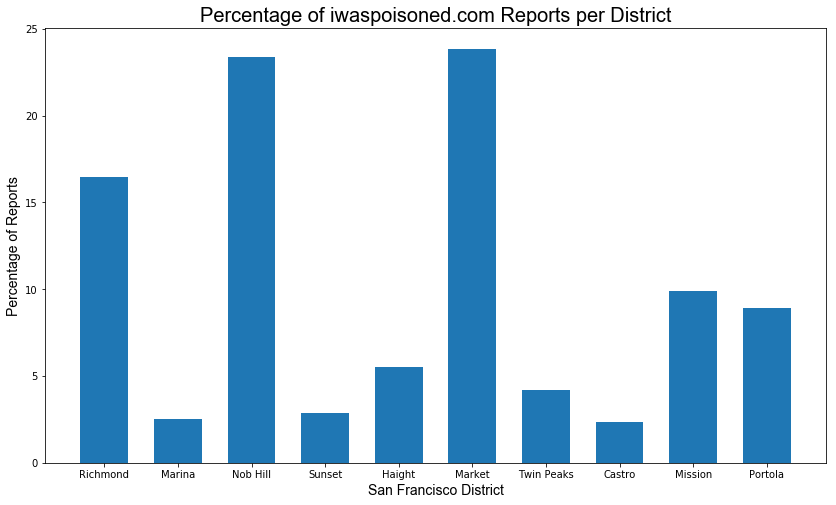

In [10]:
# construct bar plot from dictionary
plt.rcParams["figure.figsize"] = [14, 8]

# x-axis: district name, y-axis: percentage of reports
plt.bar(district_dict.keys(), district_dict.values(), width=0.65)
axis_font = {'fontname':'Arial', 'size':'14'}
title_font = {'fontname':'Arial', 'size':'20'}
plt.ylabel("Percentage of Reports", **axis_font)
plt.xlabel("San Francisco District", **axis_font)
plt.title("Percentage of iwaspoisoned.com Reports per District", **title_font)

### Observations and Comments

The very nature of the website is to report specific unhygienic or negative experiences at restaurants. As a result, it could be argued that the data might be slightly biased or subjective as it is consumer-driven experiences. However, we accounted for the fact that the reports are all negative as we did not analyze the specific content or reason of each report. Instead, we counted the number of negative experiences of restaurants in any area. 

Further, we realized certain areas could have more reports of food poisoning simply for the fact that the area is more populated than others and is more likely to have reports from consumers at its restaurants. In order to account for this, instead of simply comparing the raw counts of reports per district, we analyzed the percentages of reports of the total number of reports in San Francisco. While this may not account for differences population density exactly, it does get rid of some of the possible bias in the data to a certain extent. 

Once all the factors had been accounted for, we analyzed the data using a histogram. It can be seen that the districts with the highest percentage of the total food poisoning reports were Market and Nob Hill. Both districts together had a combination of around 50% of the total reports. Market was expected to be one of the districts with the most reports as it includes certain lower income neighborhoods such as Tenderloin and Civic Center. However, we were surprised that Nob Hill, a relatively high-end district, had almost as many reports. One reason for this result could be the fact that the Chinatown neighborhood is part of the district and a majority of the reports stemmed from restaurants in this area. 

We can see the districts with the least percentages of reports are Marina, Sunset and Castro districts with a combination of less than 10% of the total reports on the site. This result was expected as these districts are all nicer, more hygienic neighborhoods with more residential areas than offices and other buildings. 

Although this data on its own is not conclusive enough to asses the districts, it highlights the quality of restaurants in each of the districts in terms of health and hygiene which is an important factor when considering quality. 

## Conclusion and Considerations

We accounted for certain factors that may affect the data is the manner in which we divided the zipcodes into the 10 districts. We revised this division of districts a couple times as initially, we realized certain districts included upto 5 neighborhoods while other districts just had one or two. As expected, these percentage of these districts were much higher compared to others simply because they encompassed more neighborhoods. We then rearranged the neighborhoods to make the districts more fairly divided so the zipcodes were evenly distributed. We also accounted for population differences between districts by considering percentages of data rather than raw values. 

From each of our analyses, four in total, we found that there were some districts that seemed to be coming up continuously as the best districts for whatever metrics they were being analyzed for. The biggest winners being: Sunset, Castro, and Nob Hill. These came up at least 2+ times as the top winners in the total four sorts of analyses performed, while the Sunset district came up as a top district for all 4 analyses.

For the Sunset district we could see that it has the most positive number of words in its reviews, lowest levels of complaints from iwaspoisoned.com, as well as the lowest number of high risk and highest number of low risk restaurants from health inspections. Considering that it performed so well in our overall assessment it is surprising to see that when it comes to median households it is the median for all the districts in San Francisco, but it is clear to see that an overwhelming majority of people in this district are younger, and not many people under 18 reside here. 

For the Castro district we see that it performed best for ratings to price and low number of iwaspoisoned.com complaints. However, this is probably due to the fact that the Castro district only has one of the smallest population of 31,124. This falls more in line with our hypothesis as the Castro has the second largest median household income at $114,689. Something to note for the Castro district is that it had one of the lowest popultions of all of the districts, have the second least to be exact. This, is something to consider for the iwaspoisoned.com complaints as having such a low popultaion could result in lower amount of complaints as there are simply less people in total in this district.

And for Nob Hill we can find that it performed the best for the overall review sentiment analysis as well as ratings and price comparison. This district has an overall quite low median household income. This explains why it ranks well in the ratings and price comparison. While there is a huge disparity amongst highest performing districts we can take away that the best performing district was the one in between the two extremes in terms of median income. The district that was the median of the median incomes happened to be the best performing for the money, quality, health, and positive review feedback.

With further and deeper investigation it would be better to make links to socio-economic and economic trends to the quality of food, and find deeper underlying links between these factors and how food quality is effected by these factors. This helps to provide a deeper understanding on what the driving factors are for having a district for having higher quality food in order to best model it, rather to make observations on an exploratory level. 

## Sources and Links

https://www.kaggle.com/yelp-dataset/yelp-dataset

https://www.kaggle.com/vksbhandary/exploring-yelp-reviews-dataset

https://iwaspoisoned.com/

[sf_districts.jpg](https://www.google.com/search?q=sf+districts&source=lnms&tbm=isch&sa=X&ved=0ahUKEwizkqjnlZLhAhXK854KHbifDgIQ_AUIDygC&biw=1440&bih=636#imgrc=ooK4yapSjd48xM)

https://scipython.com/book/chapter-6-numpy/examples/finding-a-best-fit-straight-line/

https://www.nytimes.com/2017/01/21/us/san-francisco-children.html

https://python-graph-gallery.com/11-grouped-barplot/

http://shzhangji.com/blog/2017/09/30/pandas-and-tidy-data/

https://seaborn.pydata.org/examples/horizontal_barplot.html
